# Data Science Project - NYC Uber and Taxi Data
## Midterm report

## Team Members:
### Dhruv Anand (danand), Abhik Mondal (abhikm)

The objective of this project is to try and glean interesting observations from a large dataset of Uber and Taxi trips made in NYC. Some other datasets are also leveraged to make meaningful connections between different types of data.





In [1]:

import geopandas as gpd
import pandas as pd
import shapely
from shapely.geometry import Polygon,Point
from geopy.geocoders import GoogleV3
import rtree
import numpy as np
import re
import seaborn as sns
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

/Users/abhikm/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
boros = gpd.GeoDataFrame.from_file('nybb_16d/nybb.shp').to_crs({'init': 'epsg:4326'})
zips = gpd.GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp').to_crs({'init': 'epsg:4326'})
non_decimal = re.compile(r'[^\s\d.-]+')

subways = pd.read_csv('DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv')
subways['geometry'] = subways['the_geom'].apply(lambda z: Point(map(float,non_decimal.sub('', z).strip().split(' '))))
subways = gpd.GeoDataFrame(subways)
print subways.head()

uber = pd.read_csv('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv')
uber['geometry'] = [Point(xy) for xy in zip(uber.Lon, uber.Lat)]
uber = gpd.GeoDataFrame(uber)
#fhv = pd.read_csv('../fhv_tripdata_2016-01.csv')

                                        the_geom  \
0  POINT (-73.99027199929638 40.686728331297715)   
1    POINT (-73.9906780008789 40.69372533216928)   
2  POINT (-73.99059199905471 40.693642331621014)   
3   POINT (-73.99253735666481 40.69439311951264)   
4   POINT (-73.96224891505983 40.66272735822238)   

                                                NAME  \
0  Smith St & Bergen St At Ne Corner (To Manhatta...   
1                Court St & Montague St At Sw Corner   
2                Court St & Montague St At Sw Corner   
3              Clinton St & Montague St At Nw Corner   
4            Flatbush Ave & Empire Blvd At Sw Corner   

                                 URL         LINE  \
0  http://www.mta.info/nyct/service/          F-G   
1  http://www.mta.info/nyct/service/  2-3-4-5-N-R   
2  http://www.mta.info/nyct/service/  2-3-4-5-N-R   
3  http://www.mta.info/nyct/service/  2-3-4-5-N-R   
4  http://www.mta.info/nyct/service/        B-Q-S   

                               

In [3]:
# print fhv.head()
print uber.head()
# len(sorted(fhv['Dispatching_base_num'].value_counts(dropna=False).keys()))


          Date/Time      Lat      Lon    Base  \
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512   
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512   
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512   
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512   
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512   

                             geometry  
0   POINT (-73.95489999999999 40.769)  
1  POINT (-74.03449999999999 40.7267)  
2            POINT (-73.9873 40.7316)  
3            POINT (-73.9776 40.7588)  
4            POINT (-73.9722 40.7594)  


   BoroCode       BoroName    Shape_Area     Shape_Leng  \
0         5  Staten Island  1.623819e+09  330476.026530   
1         2          Bronx  1.186816e+09  464081.177750   
2         1      Manhattan  6.364540e+08  358410.655945   
3         3       Brooklyn  1.937484e+09  741039.196851   
4         4         Queens  3.044830e+09  895715.765066   

                                            geometry  
0  (POLYGON ((-74.05050806403248 40.5664220341941...  
1  (POLYGON ((-73.89680883223768 40.7958084451931...  
2  (POLYGON ((-74.01092841268033 40.6844914725762...  
3  (POLYGON ((-73.86706149472113 40.5820879768267...  
4  (POLYGON ((-73.83668274106698 40.5949466970491...  


NameError: name 'taxi' is not defined

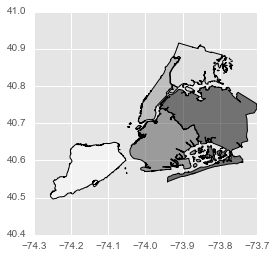

In [4]:
# plt.figure(15,1)
boros2 = gpd.GeoDataFrame.from_file('nybb_16d/nybb.shp').to_crs({'init': 'epsg:4326'})
print boros2.head()
base2 = boros2.plot()
# zips.plot(ax=base);
# circles= subways.buffer(0.005)
# mp = circles.unary_union
# boros['geometry'].intersection(mp)
# circles.plot(ax=base)
# uber[:100].loc[boros.contains(uber[:100])].plot()


# uber[:100][uber[:100].within(boros)]
#uber[:1000].plot(ax=base, color='blue',markersize=2.9)
taxi.plot(ax=base2, color='red',markersize=2.9)

In [ ]:
len(uber)

# Taxi Trip Data 

The Taxi dataset we are looking was released by the NYC Taxi and Limousine Commission 2013 . The dataset contains the following fields, medallion, hack_license, vendor_id, rate_code, store_and_fwd_flag, pickup_datetime, dropoff_datetime, passenger_count, trip_time_in_secs, trip_distance, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude. 

# Data Cleaning

In [5]:
non_decimal = re.compile(r'[^\s\d.-]+')
taxi = pd.read_csv('trip_data_1_cut2.csv')


Hi
   pickup_longitude  pickup_latitude                              geometry
0        -73.978165        40.757977          POINT (-73.978165 40.757977)
1        -74.006683        40.731781          POINT (-74.006683 40.731781)
2        -74.004707        40.737770           POINT (-74.004707 40.73777)
3        -73.974602        40.759945          POINT (-73.974602 40.759945)
4        -73.976250        40.748528  POINT (-73.97624999999999 40.748528)


# What we want to explore
The primary aim of this project is geared towards an exploration of the city's neighborhoods, traffic, hotspots,etc  through the analysis of publicly available taxi data. Some questions we can ask,

1. Where are people primarily going from Grand Central?


In [90]:
# plt.figure(15,1)
boros2 = gpd.GeoDataFrame.from_file('nybb_16d/nybb.shp').to_crs({'init': 'epsg:4326'})
#print boros2.head()
#base2 = boros2.plot()
# zips.plot(ax=base);
# circles= subways.buffer(0.005)
# mp = circles.unary_union
# boros['geometry'].intersection(mp)
# circles.plot(ax=base)
# uber[:100].loc[boros.contains(uber[:100])].plot()
#taxi=taxi[taxi['pickup_longitude']!=0.0]

# uber[:100][uber[:100].within(boros)]
#uber[:1000].plot(ax=base, color='blue',markersize=2.9)
#taxi.plot(ax=base2, color='red',markersize=2.9)

In [91]:
def create_dataframe(fn,Lat,Lon,lim=1000000):
    df = pd.read_csv(fn,nrows=lim)
    df=df[df[Lon]!=0.0]
    df['geometry'] = [Point(xy) for xy in zip(df[Lon], df[Lat])]
    df = gpd.GeoDataFrame(df)
    df.crs = {'init':'epsg:4326'}
    #df= gpd.sjoin(df,boros, how ="inner", op="intersects")
    return df

uber = create_dataframe('uber-tlc-foil-response-master/uber-trip-data/uber-raw-data-apr14.csv','Lon','Lat')
taxi = create_dataframe('trip_data_1_cut2.csv','pickup_longitude','pickup_latitude',1000)



ValueError: need at least one array to concatenate

In [83]:
#Plot
def getx(pt):
    return pt.coords[0][0]

def gety(pt):
    return pt.coords[0][1]

from scipy import ndimage
def get_heatmap(x, y,range_2d,bins=100):
    print bins
    #range_2d = range_2d[0]
    print range_2d
    xr= np.linspace(range_2d[0][0],range_2d[0][1],bins,dtype=float)
    yr = np.linspace(range_2d[1][0],range_2d[1][1],bins,dtype=float)
    heatmap, xedges, yedges = np.histogram2d(y, x,bins=(xr,yr))
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    return heatmap,extent
    
def draw_heatmap(x,y,bins,smoothing=1.3, cmap='jet'):
    range_2d=[[min(x),max(x)],[min(y),max(y)]]
    heatmap,extent = get_heatmap(x,y,range_2d,bins)
    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    #plt.xlim(-74.02,-73.94)
    #plt.ylim(40.7,40.8)

def draw_heatmap_diff(heatmap,extent,smoothing=1.3, cmap='jet'):
    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    
    
def draw_diff(df1,df2,bins,smoothing=1.3, cmap='jet'):
    x1,y1 = get_xy(df1)
    x2,y2 = get_xy(df2)
    range_2d = [[min(min(y1),min(y2)),max(max(y1),max(y2))],[min(min(x1),min(x2)),max(max(x1),max(x2))]]
    h1,e1 =get_heatmap(x1, y1,range_2d, bins)
    h2,e2 =get_heatmap(x2, y2,range_2d, bins)
    h_net = h1-h2
    h_net[h_net<0]=0
    draw_heatmap_diff(h_net,e1,cmap=cmap)
    return h_net, np.linalg.norm(h_net,2)/(h_net.size)
    
def get_xy(df):
    return (list(df.geometry.apply(getx)),list(df.geometry.apply(gety)))


100
[[-74.016402999999997, -73.776688000000007], [40.598929999999996, 40.889068999999999]]


/Users/abhikm/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log


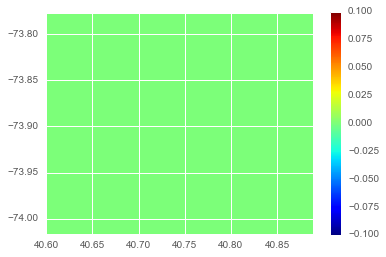

In [89]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
d= taxi[:1000]
x,y = get_xy(d)
boros.plot(ax=ax)
#draw_heatmap(d['pickup_longitude'],d['pickup_latitude'], bins=100, smoothing=1.5)
#plt.show();


In [43]:

#taxi_bf_df = create_dataframe('taxi_before.csv','pickup_longitude','pickup_latitude')
#taxi_af_df = create_dataframe('taxi_after.csv','pickup_longitude','pickup_latitude')



   BoroCode       BoroName    Shape_Area     Shape_Leng  \
0         5  Staten Island  1.623819e+09  330476.026530   
1         2          Bronx  1.186816e+09  464081.177750   
2         1      Manhattan  6.364540e+08  358410.655945   
3         3       Brooklyn  1.937484e+09  741039.196851   
4         4         Queens  3.044830e+09  895715.765066   

                                            geometry  
0  (POLYGON ((-74.05050806403248 40.5664220341941...  
1  (POLYGON ((-73.89680883223768 40.7958084451931...  
2  (POLYGON ((-74.01092841268033 40.6844914725762...  
3  (POLYGON ((-73.86706149472113 40.5820879768267...  
4  (POLYGON ((-73.83668274106698 40.5949466970491...  


ValueError: need at least one array to concatenate

ValueError: could not convert string to float: Queens

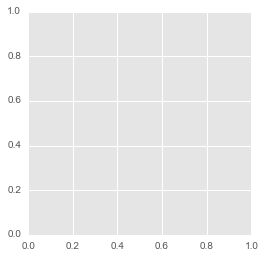

In [97]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
#plt.figure(figsize =(10,10))
#plt.xlim(-74.02,-73.94)
#plt.ylim(40.7,40.8)
boros.plot(ax=ax)
h_net,norm =draw_diff(uber[:1000],taxi[:1000],100,cmap='Reds')

#h_net2,norm2 =draw_diff(uber[:10000],uber[10000:20000],100)
#print norm,norm2






50
[[40.598929999999996, 40.889068999999999], [-74.016402999999997, -73.776688000000007]]


/Users/abhikm/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log


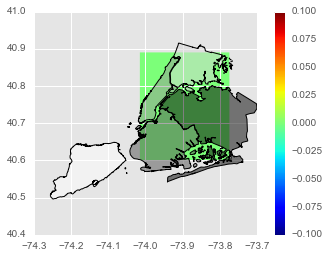

In [38]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
d= taxi[:1000]
draw_heatmap(x,y, bins=50, smoothing=1.5)
boros.plot(ax=ax)

# Taxi NYC Data Cleaning
The Taxi dataset we are looking was released by the NYC Taxi and Limousine Commission 2013 . The dataset contains the following fields, medallion, hack_license, vendor_id, rate_code, store_and_fwd_flag, pickup_datetime, dropoff_datetime, passenger_count, trip_time_in_secs, trip_distance, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude. 

The data cleaning process included two major steps:

1. 
